<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/19_Image_Spectogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

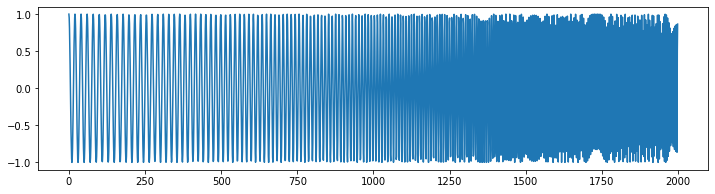

In [2]:
dt = 0.001

duration = 2

time = np.arange(0, duration, dt)

f0 = 50
f1 = 250

x = np.cos(2*np.pi*time*(f0 + (f1-f0)*np.power(time, 2)/(3*duration**2)))

plt.figure(figsize=(12, 3))
plt.plot(x)
plt.show()

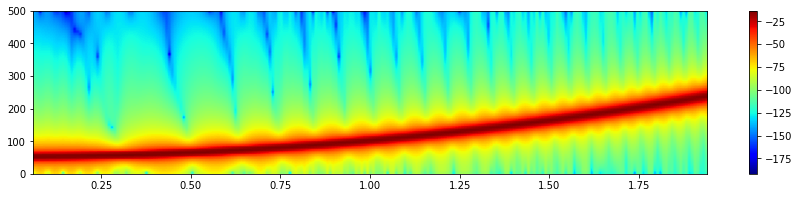

In [3]:
plt.figure(figsize=(15.1, 3))
plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120, cmap='jet')
plt.colorbar()
plt.show()

In [4]:
%%capture
!wget https://github.com/JoDeMiro/Data/blob/main/Audio/30.mp?raw=true

In [5]:
y, sampling_rate = librosa.load('30.mp?raw=true')

In [6]:
# Play an audio
from google.colab import output
output.eval_js('new Audio("https://github.com/JoDeMiro/Data/blob/main/Audio/30.mp?raw=true").play()')

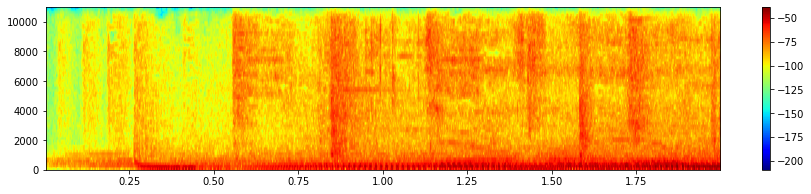

In [7]:
plt.figure(figsize=(15.1, 3))
plt.specgram(y[0:sampling_rate*2], NFFT=128, Fs=sampling_rate, noverlap=100, cmap='jet')
plt.colorbar()
plt.show()

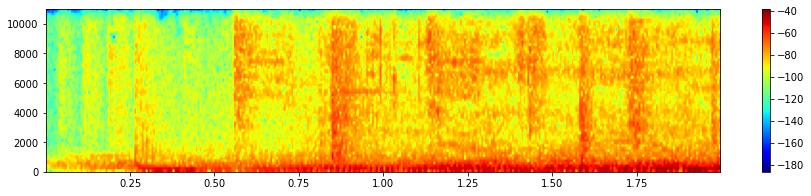

In [8]:
plt.figure(figsize=(15.1, 3))
plt.specgram(y[0:sampling_rate*2], NFFT=128, Fs=sampling_rate, noverlap=3, cmap='jet')
plt.colorbar()
plt.show()

In [9]:
sec = np.size(y) / sampling_rate

print(sec)

30.633514739229025


In [10]:
# For plotting headlessly
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = plt.Figure(figsize=(5, 4), dpi=100)
canvas = FigureCanvas(fig)

# Do plotting here
ax = fig.add_subplot(111)
ax.specgram(y[0:sampling_rate*2], NFFT=128, Fs=sampling_rate, noverlap=3, cmap='gray')
ax.axis('off')

# Retrieve a view on the renderer buffer
canvas.draw()
buf = canvas.buffer_rgba()

# convert to a NumPy array
p = np.asarray(buf)

In [11]:
b = p[48:-50, 63:-64, 1] # crop and use only the first chanel which is equal to the other

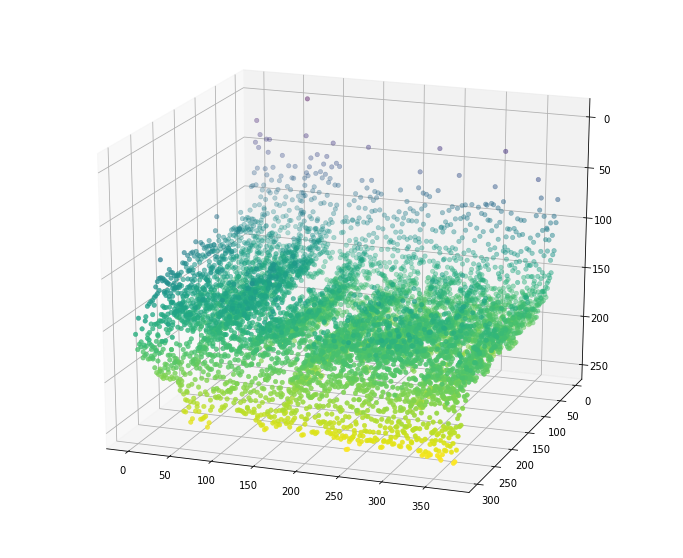

In [30]:
X, Y = np.meshgrid(np.arange(1, b.shape[1] + 1), np.arange(1, b.shape[0] + 1))

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

div = 4
x = X[0::div, 0::div]
y = Y[0::div, 0::div]
z = b[0::div, 0::div]
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
ax.mouse_init()
ax.view_init(200, 250)
plt.show()

In [14]:
%%capture
!pip install plotly
!pip install chart-studio

In [15]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot

In [26]:
surface = go.Surface(x = x, y = y, z = z)
data = [surface]

fig = go.Figure(data = data)

fig.update_layout(title = '', autosize=False,
                  width = 800, height = 600,
                  scene = dict(
                    xaxis_title = 'x',
                    yaxis_title = 'y',
                    zaxis_title = ' '),
                  margin = dict(l = 1, r = 1, b = 1, t = 1))

fig.show()

In [27]:
surface = go.Surface(x = x, y = y, z = z)
data = [surface]

fig = go.Figure(data = data)

fig.update_layout(title = '', autosize=False,
                  width = 800, height = 600,
                  scene = dict(
                    xaxis_title = 'x',
                    yaxis_title = 'y',
                    zaxis_title = ' '),
                  margin = dict(l = 1, r = 1, b = 1, t = 91))

fig.show()